In [1]:
import pandas as pd
import numpy as np

filepath = ("/Users/irisvirus/Desktop/Becode/Python/Projects/immo_data_analysis/immo_data_analysis/properties_data_set_19_11_20H00.csv")
df = pd.read_csv(filepath)

In [2]:
df.set_index("house_index",drop=True, inplace=True )

In [3]:
df.head(10)

,bedrooms,property_type,property_subtype,locality,postal_code,street,number,box,kitchen,facades,...,fireplaceCount,buildingState,garden,gardenSurface,pool,landSurface,livingArea,surfaceOfThePlot,typeOfSale,province
house_index,,,,,,,,,,,,,,,,,,,,,
0,2,APARTMENT,APARTMENT,LEUVEN,3000,Kaboutermansstraat,89,00.01,1,2.0,...,0,TO_BE_DONE_UP,1,100,0,NaN,60.0,NaN,NaN,flemish_brabant
1,3,HOUSE,HOUSE,Waarschoot,9950,Zoutweg,120,NaN,1,NaN,...,0,JUST_RENOVATED,0,0,0,260.0,136.0,260.0,NaN,east_flanders
2,1,APARTMENT,APARTMENT,BORGERHOUT,2140,Bouwhandelstraat,53,202,1,2.0,...,0,GOOD,0,0,0,NaN,59.0,NaN,NaN,antwerp_province
3,5,HOUSE,HOUSE,Bouillon Corbion,6838,Rue du Tambour,30,NaN,1,2.0,...,0,TO_RENOVATE,1,400,0,562.0,156.0,562.0,NaN,luxembourg_province
4,2,HOUSE,HOUSE,Grâce-Hollogne,4460,Rue des Meuniers,36,A,1,2.0,...,0,TO_RENOVATE,1,275,0,476.0,151.0,476.0,NaN,liège_province
5,3,HOUSE,HOUSE,Ans,4430,Rue de l'Yser,193,NaN,1,2.0,...,1,GOOD,1,187,0,255.0,115.0,255.0,NaN,liège_province
6,2,APARTMENT,APARTMENT,MERKSEM,2170,Jozef Mulsstraat,30,V1,1,2.0,...,0,GOOD,0,0,0,NaN,70.0,NaN,UnderOption,antwerp_province
7,2,APARTMENT,APARTMENT,Ganshoren,1083,Avenue Marie de Hongrie,85,NaN,1,2.0,...,0,TO_BE_DONE_UP,0,0,0,NaN,95.0,NaN,UnderOption,brussels_capital
8,2,APARTMENT,APARTMENT,Evere,1140,Av. des Anc. Combattants,84,NaN,1,NaN,...,0,GOOD,0,0,0,NaN,87.0,NaN,NaN,brussels_capital


In [4]:
#Cleaning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

#Load the csv
df = pd.read_csv("properties_data_set_19_11_20H00.csv")

#Additional data cleaning and renaming
df = df[df['price'] >= 40000]
#Additional data cleaning and renaming
df = df[df['bedrooms'] <= 9]
#Additional Garden Surface cleaning
df = df[
    (df['gardenSurface'] <= df['surfaceOfThePlot']) | 
    (df['gardenSurface'].isnull()) | 
    (df['surfaceOfThePlot'].isnull())
]
df['buildingState'] = df['buildingState'].replace({
    'AS_NEW': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'TO_RESTORE': 4,
    'TO_RENOVATE': 4,
    'TO_BE_DONE_UP':4
})
#print(df['buildingState'].nunique())
#print(df['buildingState'].unique())


df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
df['province'] = df['province'].replace({'flemish_brabant': 'Flemish Brabant', 'hainaut_province': 'Hainaut', 'antwerp_province': 'Antwerp', 'brussels_capital': 'Brussels', 
                                         'limburg_province': 'Limburg', 'liège_province': 'Liège', 'luxembourg_province': 'Luxembourg', 'namur_province': 'Namur', 
                                         'walloon_brabant': 'Walloon Brabant', 'west_flanders': 'West Flanders','east_flanders': 'East Flanders'})
#print(df['province'].nunique())
#print(df['province'].unique())


#Number of rows and columns and useless columns dropped
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)
df = df.drop(['street', 'number', 'box', 'landSurface', 'house_index', 'fireplaceCount'], axis=1)

#NaN counts before changes
nan_count = df.isna().sum()
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count"]
for column_name in nan_count.index:
    table.add_row([column_name, nan_count[column_name]])
print(table)

#Cleaning
columns_to_replace = ['terraceSurface']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df = df.dropna(subset=['livingArea'])
df = df.drop(['property_subtype', 'typeOfSale', 'terrace', 'garden'], axis=1)

#New NaN counts after changes
nan_count = df.isna().sum()
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count"]
for column_name in nan_count.index:
    table.add_row([column_name, nan_count[column_name]])
print(table)

+-------------------+-------+
|        Axis       | Count |
+-------------------+-------+
|   Number of Rows  | 15934 |
| Number of Columns |   26  |
+-------------------+-------+
+------------------+-----------+
|   Column Name    | NaN Count |
+------------------+-----------+
|     bedrooms     |     0     |
|  property_type   |     0     |
| property_subtype |     0     |
|     locality     |     0     |
|   postal_code    |     0     |
|     kitchen      |     0     |
|     facades      |    4516   |
|      price       |     0     |
|    furnished     |     0     |
|     terrace      |     0     |
|  terraceSurface  |    4736   |
|    fireplace     |     0     |
|  buildingState   |    2693   |
|      garden      |     0     |
|  gardenSurface   |     0     |
|       pool       |     0     |
|    livingArea    |    922    |
| surfaceOfThePlot |    7150   |
|    typeOfSale    |   12525   |
|     province     |     0     |
+------------------+-----------+
+------------------+--------

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_3353/3142186939.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['buildingState'] = df['buildingState'].replace({


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#How many rows & colums
df.shape

(15012, 16)

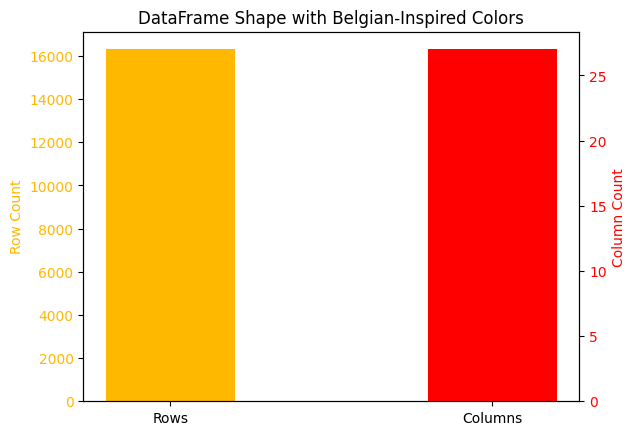

In [7]:
import matplotlib.pyplot as plt

# Data
counts = [16305, 27]
labels = ['Rows', 'Columns']

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the Rows data (Darker Yellow, Golden)
ax1.bar(labels[0], counts[0], color='#FFB800', width=0.4, label='Rows')  # Golden Yellow
ax1.set_ylabel('Row Count', color='#FFB800')
ax1.tick_params(axis='y', labelcolor='#FFB800')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the Columns data (Red)
ax2.bar(labels[1], counts[1], color='red', width=0.4, label='Columns')
ax2.set_ylabel('Column Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title
plt.title('DataFrame Shape with Belgian-Inspired Colors')

plt.show()


Pricing Cluster

<Axes: xlabel='price', ylabel='Count'>

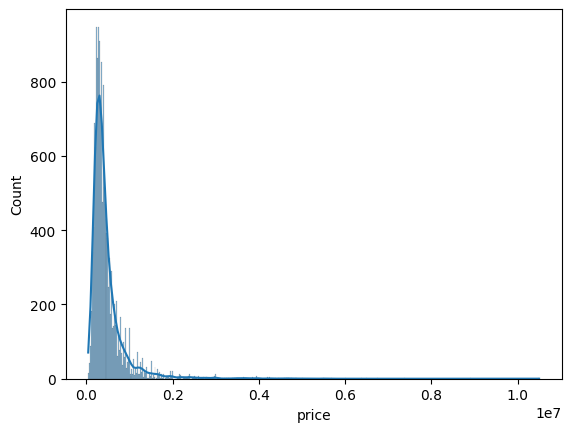

In [8]:
import seaborn as sns
sns.histplot(df['price'], kde=True)


In [9]:
df.describe()

,bedrooms,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot
count,15012.000000,15012.000000,15012.000000,10898.000000,1.501200e+04,15012.000000,15012.000000,15012.000000,12532.000000,15012.000000,15012.000000,15012.00000,8188.000000
mean,2.844857,5308.540368,0.622902,2.871261,4.749359e+05,0.038969,9.565681,0.047029,2.640361,141.061018,0.030242,167.10465,1216.613703
std,1.284666,3248.948134,0.484676,0.879674,4.699683e+05,0.193527,41.114695,0.211708,1.089269,937.515600,0.171260,133.90925,3715.601171
min,0.000000,1000.000000,0.000000,1.000000,4.000000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.00000,0.000000
25%,2.000000,2140.000000,0.000000,2.000000,2.493750e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.00000,235.000000
50%,3.000000,4430.000000,1.000000,3.000000,3.492500e+05,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,140.00000,533.000000
75%,4.000000,8510.000000,1.000000,4.000000,5.250000e+05,0.000000,10.000000,0.000000,3.000000,0.000000,0.000000,201.00000,1052.000000
max,9.000000,9992.000000,1.000000,9.000000,1.050000e+07,1.000000,3749.000000,1.000000,4.000000,70470.000000,1.000000,7515.00000,160737.000000


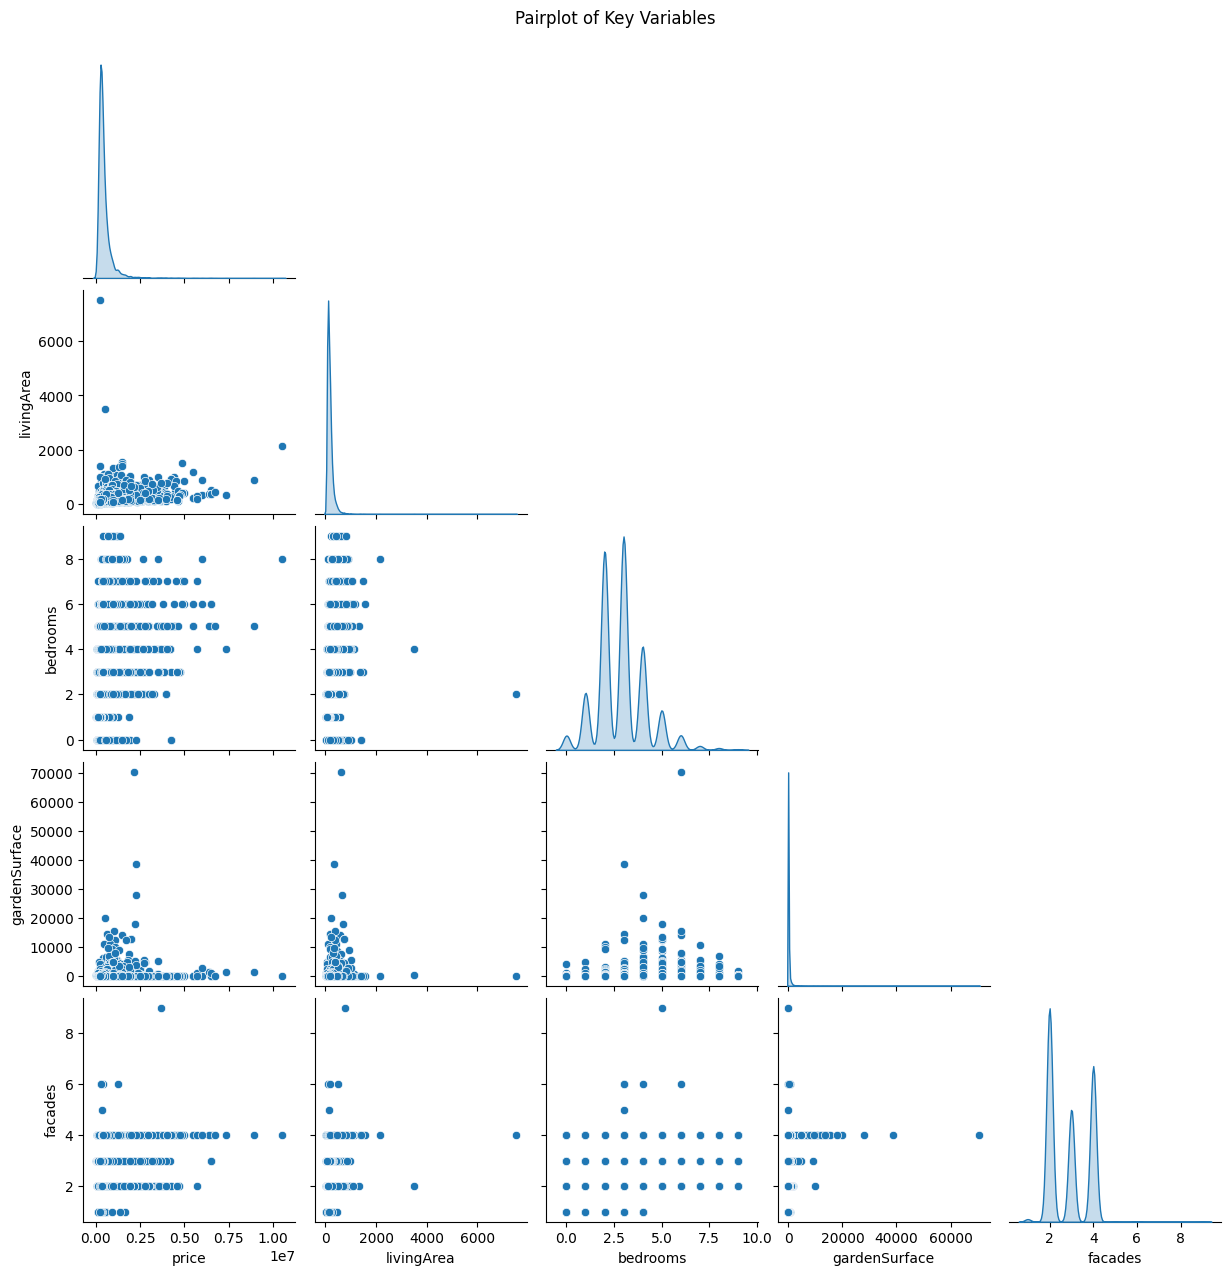

In [10]:
sns.pairplot(df[['price', 'livingArea', 'bedrooms', 'gardenSurface', 'facades']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


In [11]:
df.head(10)

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,province
0,2,APARTMENT,LEUVEN,3000,1,2.0,299500.0,0,0.0,0,4.0,100,0,60.0,NaN,Flemish Brabant
1,3,HOUSE,Waarschoot,9950,1,NaN,360000.0,0,0.0,0,2.0,0,0,136.0,260.0,East Flanders
2,1,APARTMENT,BORGERHOUT,2140,1,2.0,145000.0,0,0.0,0,3.0,0,0,59.0,NaN,Antwerp
3,5,HOUSE,Bouillon Corbion,6838,1,2.0,149500.0,0,15.0,0,4.0,400,0,156.0,562.0,Luxembourg
4,2,HOUSE,Grâce-Hollogne,4460,1,2.0,179000.0,0,0.0,0,4.0,275,0,151.0,476.0,Liège
5,3,HOUSE,Ans,4430,1,2.0,230000.0,1,40.0,1,3.0,187,0,115.0,255.0,Liège
6,2,APARTMENT,MERKSEM,2170,1,2.0,185000.0,0,3.0,0,3.0,0,0,70.0,NaN,Antwerp
7,2,APARTMENT,Ganshoren,1083,1,2.0,230000.0,0,6.0,0,4.0,0,0,95.0,NaN,Brussels
8,2,APARTMENT,Evere,1140,1,NaN,285000.0,0,3.0,0,3.0,0,0,87.0,NaN,Brussels
9,3,HOUSE,Oosteeklo,9968,1,NaN,289000.0,0,0.0,0,4.0,0,0,159.0,626.0,East Flanders


In [12]:
df.bedrooms.value_counts()

bedrooms
3    4938
2    4612
4    2399
1    1323
5     917
6     340
0     333
7      91
8      43
9      16
Name: count, dtype: int64

Correlations

#Price vs Bedroom correlation

Average number of bedrooms per region

PROVINCIAL COUNTS

In [13]:
provinces = df["province"].unique()
provinces 

array(['Flemish Brabant', 'East Flanders', 'Antwerp', 'Luxembourg',
       'Liège', 'Brussels', 'West Flanders', 'Limburg', 'Hainaut',
       'Walloon Brabant', 'Namur'], dtype=object)

In [14]:
east_flanders = df[df["province"] == "East Flanders"]
west_flanders = df[df["province"] == "West Flanders"]
antwerp_province = df[df["province"] == "Antwerp"]
brussels_capital = df[df["province"] == "Brussels"]
liège_province = df[df["province"] == "Liège"]
limburg_province = df[df["province"] == "Limburg"]
luxembourg_province = df[df["province"] == "Luxembourg"]
walloon_brabant = df[df["province"] == "Walloon Brabant"]
namur_province = df[df["province"] == "Namur"]
flemish_brabant = df[df["province"] == "Flemish Brabant"]
hainaut = df[df["province"] == "Hainaut"]

In [15]:
print(west_flanders.shape)

(3385, 16)


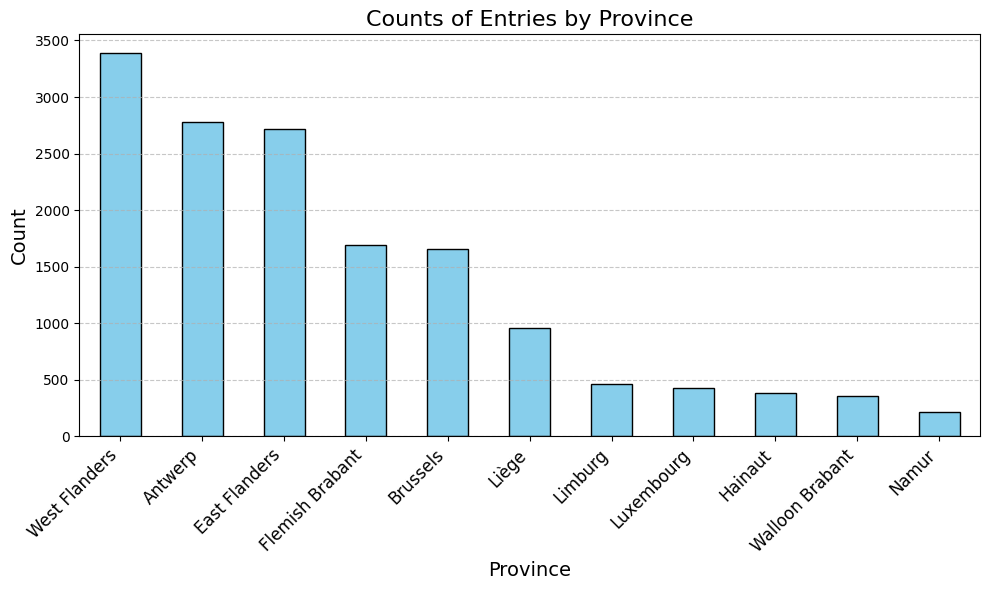

In [16]:
province_counts = df["province"].value_counts()

""# Visualize the counts
plt.figure(figsize=(10, 6))
province_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Counts of Entries by Province", fontsize=16)
plt.xlabel("Province", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

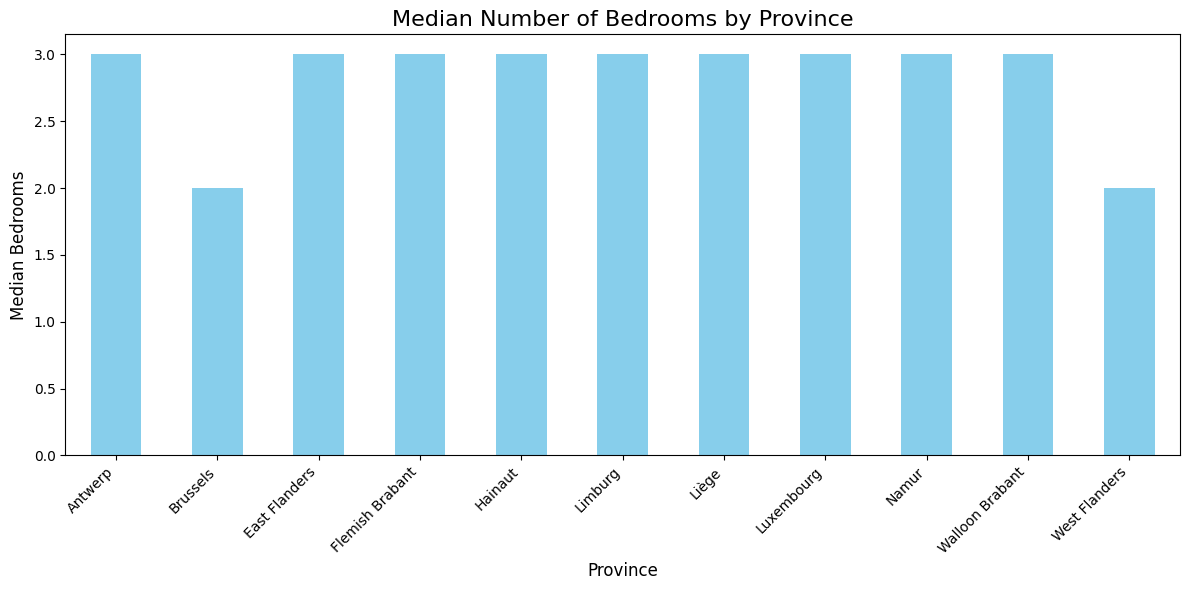

In [17]:
# Calculate the median number of bedrooms for each province
median_bedrooms_by_province = df.groupby("province")["bedrooms"].median()




# Plot the bar chart for median number of bedrooms
median_bedrooms_by_province.plot(
    kind="bar",
    figsize=(12, 6),
    color="skyblue",  # Use a light color to keep it clear
)

# Add chart title and labels
plt.title("Median Number of Bedrooms by Province", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Median Bedrooms", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the chart
plt.show()


In [18]:
price_bedroom_province = df[["price","bedrooms"]]
bedroom_v_price=((df["price"]).corr(df["bedrooms"]))
bedroom_v_price

0.3451665328655973

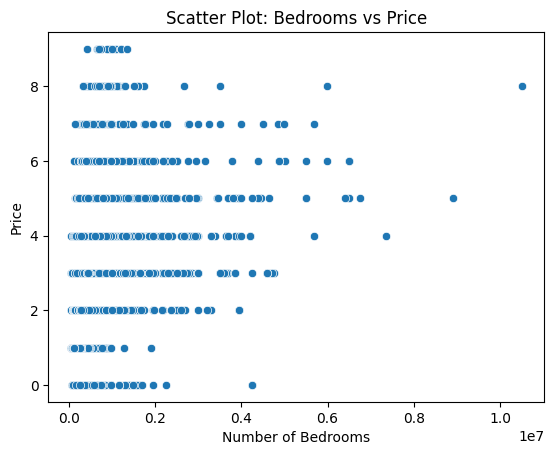

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["bedrooms"])
# Adding titles
plt.title("Scatter Plot: Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")


# Show the plot
plt.show()


Bedroom Median Average & Price Median Average Across the provinces

In [20]:
region_bedroom_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    avg_bedrooms=('bedrooms', 'mean')
).reset_index().sort_values(by= "avg_price", ascending=False)
print(region_bedroom_price)

           province  avg_price  avg_bedrooms
9   Walloon Brabant   430000.0      3.253521
3   Flemish Brabant   399000.0      3.113152
10    West Flanders   369000.0      2.557755
0           Antwerp   350000.0      2.889169
1          Brussels   350000.0      2.427969
2     East Flanders   350000.0      2.964615
5           Limburg   329000.0      3.111354
7        Luxembourg   320000.0      3.340426
8             Namur   289000.0      2.981221
4           Hainaut   277000.0      3.250000
6             Liège   260000.0      2.952033


<bound method _AxesBase.set_xlabel of <Axes: title={'center': 'Average Price and Bedrooms per Province'}, xlabel='province', ylabel='Average Price'>>

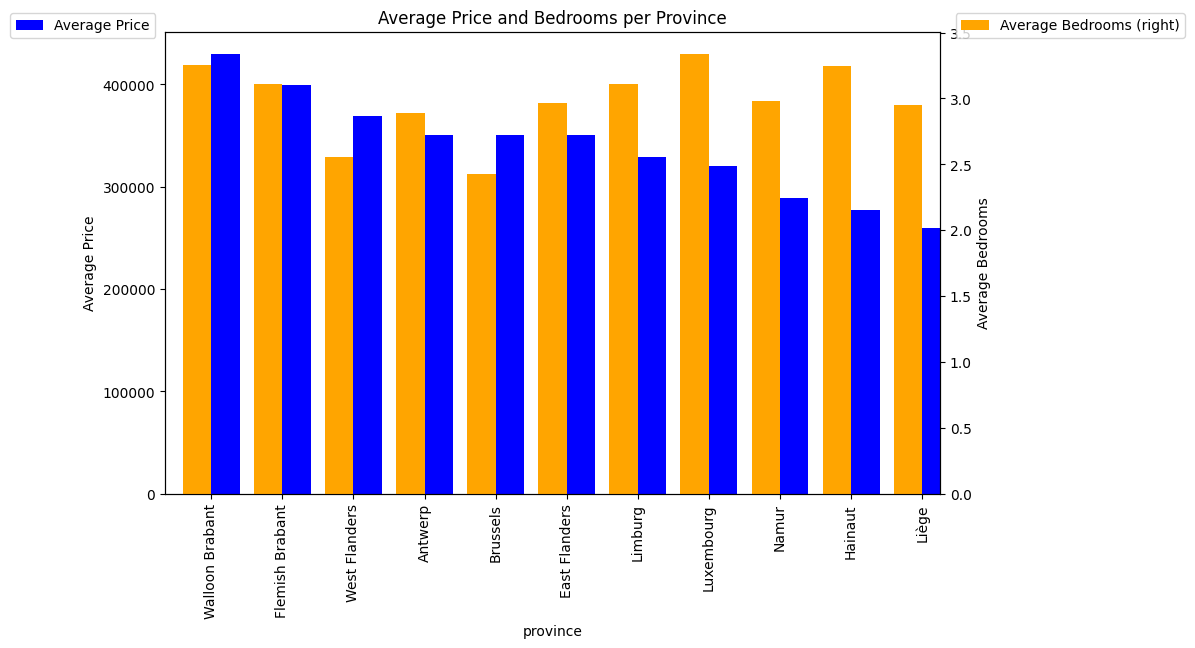

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot avg_price on the primary y-axis
region_bedroom_price.plot(
    x='province',
    y='avg_price',
    kind='bar',
    ax=ax,
    color='blue',
    label='Average Price',
    width=0.4,
    position=0
)

# Plot avg_bedrooms on the secondary y-axis
region_bedroom_price.plot(
    x='province',
    y='avg_bedrooms',
    kind='bar',
    ax=ax,
    color='orange',
    label='Average Bedrooms',
    width=0.4,
    position=1,
    secondary_y=True
)

# Adjust legend position
ax.legend(loc='upper left', bbox_to_anchor=(-0.20, 1.04), borderaxespad=0)
ax.right_ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1.04), borderaxespad=0)

# Title and labels
ax.set_title("Average Price and Bedrooms per Province")
ax.set_ylabel("Average Price")
ax.right_ax.set_ylabel("Average Bedrooms")  # Label for the secondary axis
ax.set_xlabel


#Price vs LivingArea correlation

In [22]:

livingA_v_house = ((df["price"]).corr(df["livingArea"]))
livingA_v_house

0.4247007611952311

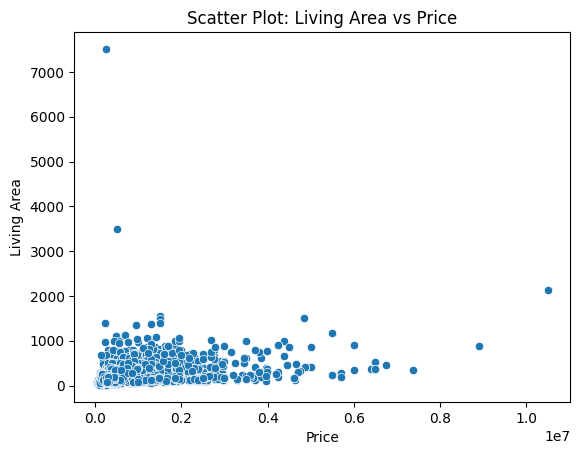

In [23]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["livingArea"])
# Adding titles
plt.title("Scatter Plot: Living Area vs Price")
plt.ylabel("Living Area")
plt.xlabel("Price")
# Show the plot
plt.show()


In [24]:
region_livingArea_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    avg_living_area =('livingArea', 'mean'),
    avg_bedrooms=('bedrooms', 'median')
).reset_index().sort_values(by= "avg_price", ascending=False)
print(region_livingArea_price)

           province  avg_price  avg_living_area  avg_bedrooms
9   Walloon Brabant   430000.0       185.529577           3.0
3   Flemish Brabant   399000.0       193.889218           3.0
10    West Flanders   369000.0       137.681832           2.0
0           Antwerp   350000.0       180.445844           3.0
1          Brussels   350000.0       139.469560           2.0
2     East Flanders   350000.0       179.500553           3.0
5           Limburg   329000.0       213.572052           3.0
7        Luxembourg   320000.0       179.621749           3.0
8             Namur   289000.0       151.948357           3.0
4           Hainaut   277000.0       182.286842           3.0
6             Liège   260000.0       160.709072           3.0


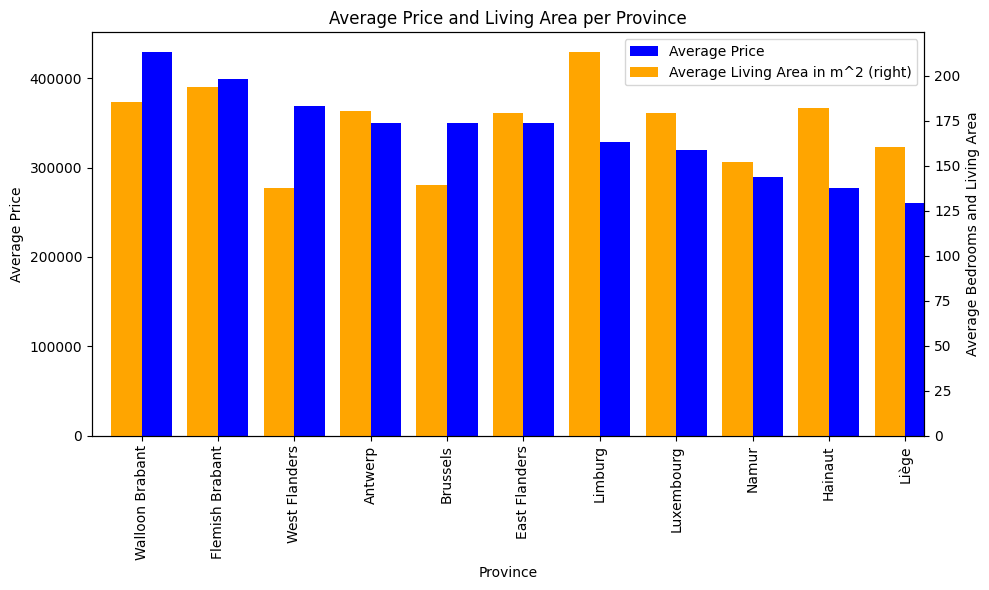

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming region_livingArea_price DataFrame is already calculated
fig, ax = plt.subplots(figsize=(10, 6))

# Plot avg_price on the primary y-axis
region_livingArea_price.plot(
    x='province',
    y='avg_price',
    kind='bar',
    ax=ax,
    color='blue',
    label='Average Price',
    width=0.4,
    position=0
)

# Plot avg_living_area on the secondary y-axis (scaled)
region_livingArea_price.plot(
    x='province',
    y='avg_living_area',
    kind='bar',
    ax=ax,
    color='orange',
    label='Average Living Area in m^2',
    width=0.4,
    position=1,
    secondary_y=True
)


# Adjusting the Y-axis scales for better visibility
ax.set_yscale('linear')  # Log scale for price and living area (optional but can help with very different value ranges)

# Adjust legend position


# Title and labels
ax.set_title("Average Price and Living Area per Province")
ax.set_ylabel("Average Price")
ax.right_ax.set_ylabel("Average Bedrooms and Living Area")  # Label for the secondary axis
ax.set_xlabel("Province")

# Show the plot
plt.tight_layout()
plt.show()


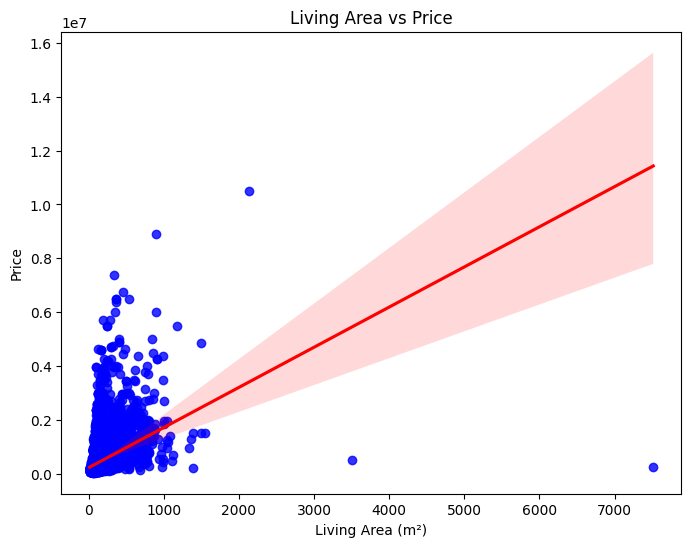

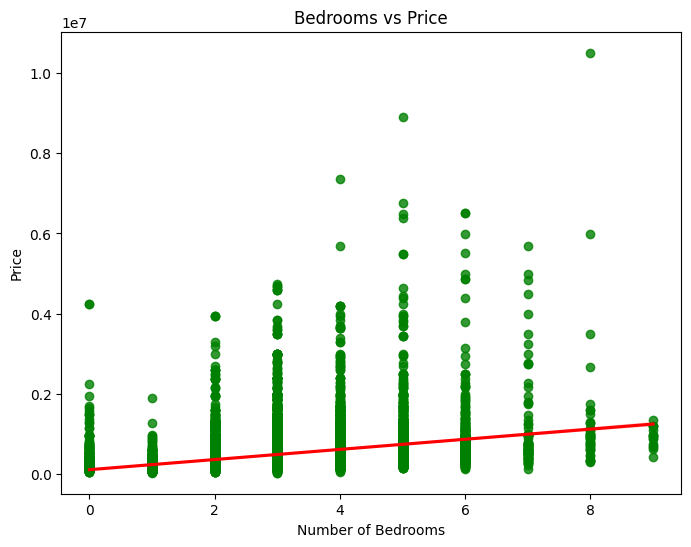

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Living Area vs Price with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='livingArea', y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Living Area vs Price")
plt.xlabel("Living Area (m²)")
plt.ylabel("Price")
plt.show()

# Scatter plot for Bedrooms vs Price with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='bedrooms', y='price', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()


#Price vs Garden

In [27]:
print(df.shape)


(15012, 16)


In [28]:
# Filter rows where gardenSurface is not greater than surfaceOfThePlot or where either column is null
df = df[
    (df['gardenSurface'] <= df['surfaceOfThePlot']) | 
    (df['gardenSurface'].isnull()) | 
    (df['surfaceOfThePlot'].isnull())
]

In [29]:
print(df.shape)


(15012, 16)


In [30]:
test = df[df["gardenSurface"] == 136700]
test

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,province


In [31]:
df.gardenSurface.dtype

dtype('int64')

In [32]:
# Get the 20 rows with the highest gardenSurface values
top_20_garden_surfaces = df.nlargest(20, 'gardenSurface')

# Print the result
print(top_20_garden_surfaces)


       bedrooms property_type            locality  postal_code  kitchen  \
4962          6         HOUSE                Asse         1730        1   
13951         3         HOUSE             Belsele         9111        0   
6657          4         HOUSE           BONHEIDEN         2820        1   
4946          4         HOUSE              Bièvre         5555        1   
9932          5         HOUSE  Waimes Faymonville         4950        1   
8587          6         HOUSE    Attert (Metzert)         6717        1   
1026          3         HOUSE             Herselt         2230        1   
7810          6         HOUSE           Rotselaar         3110        1   
13936         5         HOUSE            Estinnes         7120        0   
9295          5         HOUSE           HOEILAART         1560        1   
9931          5         HOUSE            OVERIJSE         3090        1   
7485          5         HOUSE          GRIMBERGEN         1850        1   
10754         3         H

In [33]:
garden_v_price = ((df["price"]).corr(df["gardenSurface"]))
garden_v_price

0.11997945394934947

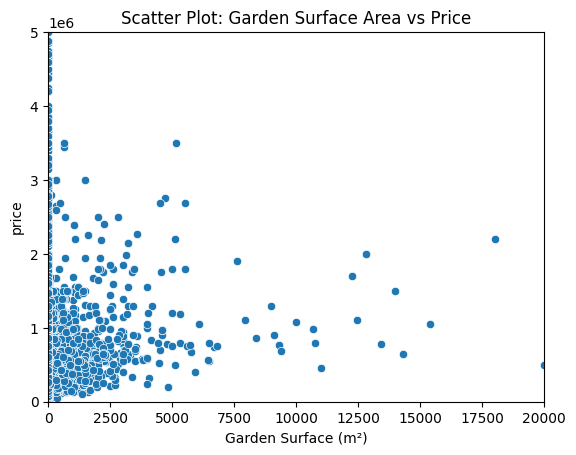

In [34]:
# Scatter plot of price vs Garden Surface Area
sns.scatterplot(x=df["gardenSurface"], y=df["price"])
# Adding titles
plt.title("Scatter Plot: Garden Surface Area vs Price")
plt.ylabel("price")
plt.xlabel("Garden Surface (m²)")
plt.xlim(0, 20000)
plt.ylim(0, 5000000)
# Show the plot
plt.show()


In [35]:
region_gardenSurface_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    avg_garden_area =('gardenSurface', 'mean'),
    
).reset_index().sort_values(by=["avg_price", "avg_garden_area"], ascending=False)
print(region_gardenSurface_price)

           province  avg_price  avg_garden_area
9   Walloon Brabant   430000.0       431.183099
3   Flemish Brabant   399000.0       230.677725
10    West Flanders   369000.0        33.685081
0           Antwerp   350000.0       118.062612
2     East Flanders   350000.0       108.852562
1          Brussels   350000.0        56.153707
5           Limburg   329000.0        69.270742
7        Luxembourg   320000.0       365.706856
8             Namur   289000.0       433.563380
4           Hainaut   277000.0       339.557895
6             Liège   260000.0       351.154327


#Could not use median, I think due to 0 values#

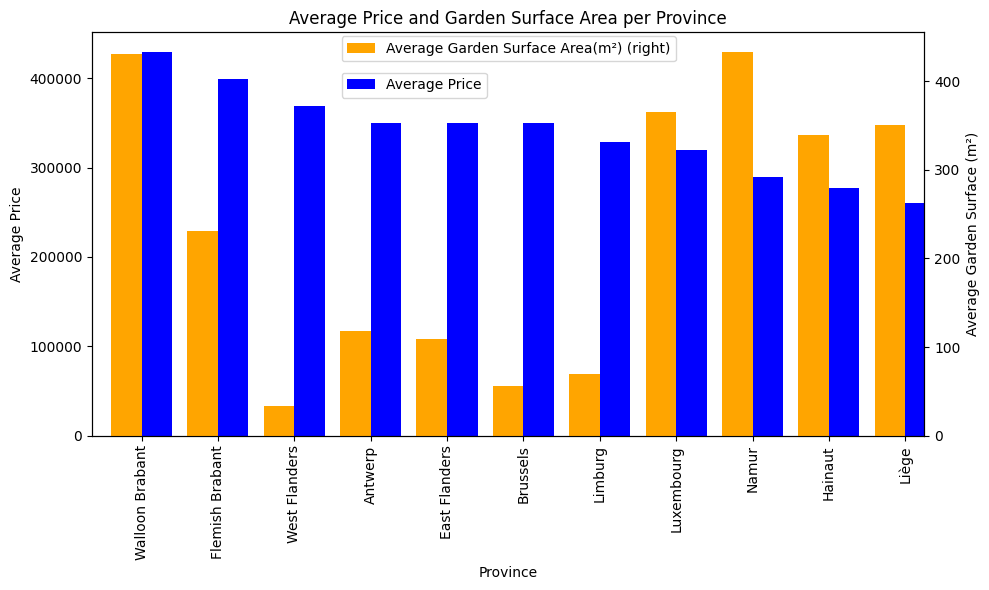

In [36]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot avg_price on the primary y-axis
region_gardenSurface_price.plot(
    x='province',
    y='avg_price',
    kind='bar',
    ax=ax,
    color='blue',
    label='Average Price',
    width=0.4,
    position=0
)

# Plot avg_living_area on the secondary y-axis (scaled)
region_gardenSurface_price.plot(
    x='province',
    y='avg_garden_area',
    kind='bar',
    ax=ax,
    color='orange',
    label='Average Garden Surface Area(m²)',
    width=0.4,
    position=1,
    secondary_y=True
)


# Adjusting the Y-axis scales for better visibility
ax.set_yscale('linear')  # Log scale for price and living area (optional but can help with very different value ranges)

# Adjust legend position
ax.legend(loc='upper left', bbox_to_anchor=(0.3,0.90), borderaxespad=0)
ax.right_ax.legend(loc='upper left', bbox_to_anchor=(0.3, 0.99), borderaxespad=0)

# Title and labels
ax.set_title("Average Price and Garden Surface Area per Province")
ax.set_ylabel("Average Price")
ax.right_ax.set_ylabel("Average Garden Surface (m²)")  # Label for the secondary axis
ax.set_xlabel("Province")

# Show the plot
plt.tight_layout()
plt.show()


SurfacePlot

In [37]:
surfaceOfThePlot_v_price = ((df["price"]).corr(df["surfaceOfThePlot"]))
surfaceOfThePlot_v_price

0.31226245896778454

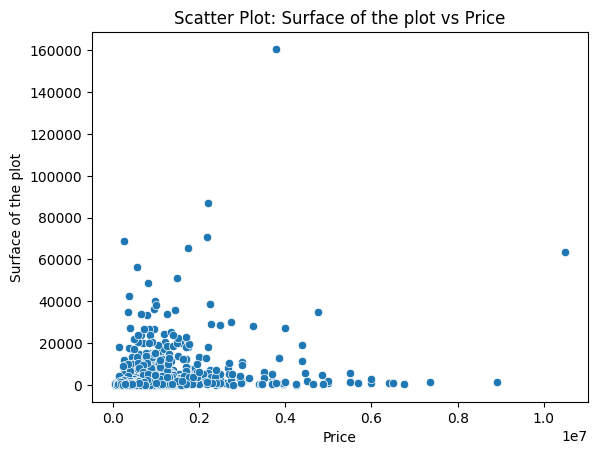

In [38]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["surfaceOfThePlot"])
# Adding titles
plt.title("Scatter Plot: Surface of the plot vs Price")
plt.ylabel("Surface of the plot")
plt.xlabel("Price")
# Show the plot
plt.show()


In [39]:
region_surfacePlot_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    avg_surfacePlot_area =('surfaceOfThePlot', 'mean'),
    
).reset_index().sort_values(by=["avg_price"], ascending=False)
print(region_surfacePlot_price)

           province  avg_price  avg_surfacePlot_area
9   Walloon Brabant   430000.0           2384.968872
3   Flemish Brabant   399000.0           1388.296356
10    West Flanders   369000.0            822.583936
0           Antwerp   350000.0           1397.349770
1          Brussels   350000.0            477.151125
2     East Flanders   350000.0           1015.453704
5           Limburg   329000.0           2081.870871
7        Luxembourg   320000.0           1623.395137
8             Namur   289000.0           1474.541935
4           Hainaut   277000.0           1217.875839
6             Liège   260000.0            977.628743


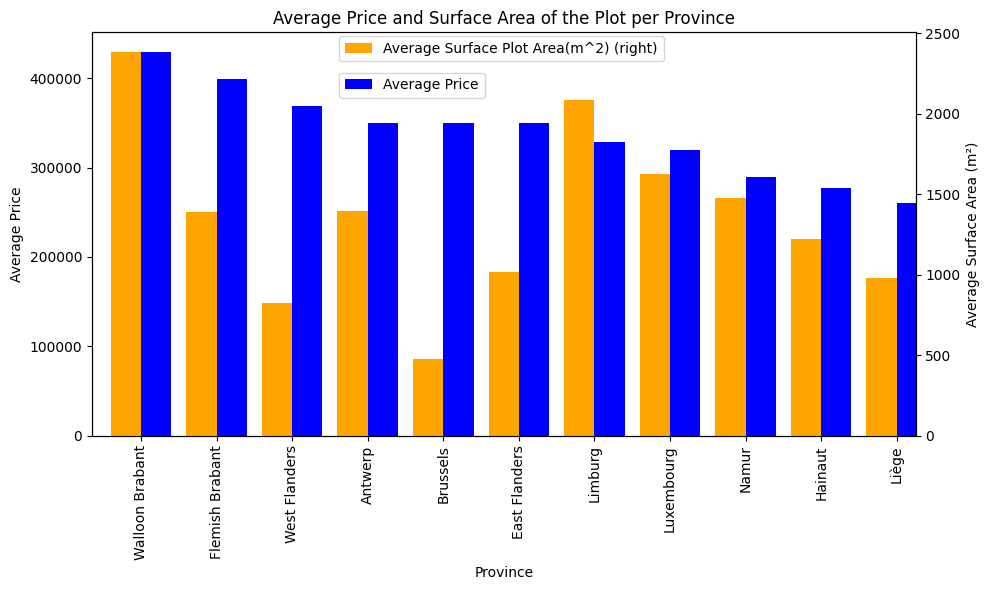

In [40]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot avg_price on the primary y-axis
region_surfacePlot_price.plot(
    x='province',
    y='avg_price',
    kind='bar',
    ax=ax,
    color='blue',
    label='Average Price',
    width=0.4,
    position=0
)

# Plot avg_living_area on the secondary y-axis (scaled)
region_surfacePlot_price.plot(
    x='province',
    y='avg_surfacePlot_area',
    kind='bar',
    ax=ax,
    color='orange',
    label='Average Surface Plot Area(m^2)',
    width=0.4,
    position=1,
    secondary_y=True
)


# Adjusting the Y-axis scales for better visibility
ax.set_yscale('linear')  # Log scale for price and living area (optional but can help with very different value ranges)

# Adjust legend position
ax.legend(loc='upper left', bbox_to_anchor=(0.3,0.90), borderaxespad=0)
ax.right_ax.legend(loc='upper left', bbox_to_anchor=(0.3, 0.99), borderaxespad=0)

# Title and labels
ax.set_title("Average Price and Surface Area of the Plot per Province")
ax.set_ylabel("Average Price")
ax.right_ax.set_ylabel("Average Surface Area (m²)")  # Label for the secondary axis
ax.set_xlabel("Province")

# Show the plot
plt.tight_layout()
plt.show()


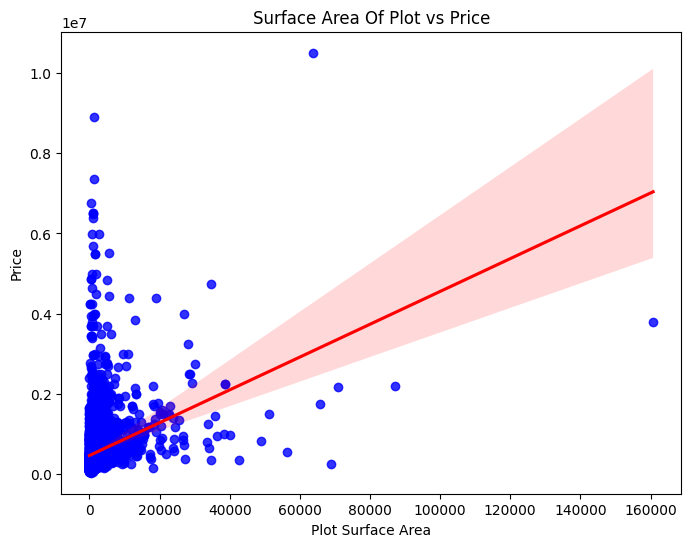

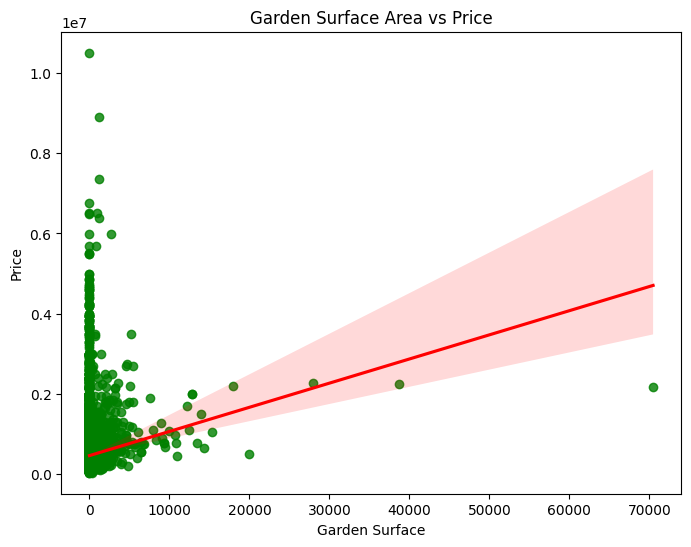

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Surface Plot Area vs Price with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='surfaceOfThePlot', y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Surface Area Of Plot vs Price")
plt.xlabel("Plot Surface Area")
plt.ylabel("Price")
plt.show()

# Scatter plot for Garden Surface Area vs Price with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='gardenSurface', y='price', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Garden Surface Area vs Price")
plt.xlabel("Garden Surface")
plt.ylabel("Price")
plt.show()


Price vs Pool Correlation

In [42]:
pool_v_price = ((df["price"]).corr(df["pool"]))
pool_v_price

0.2508218523012398

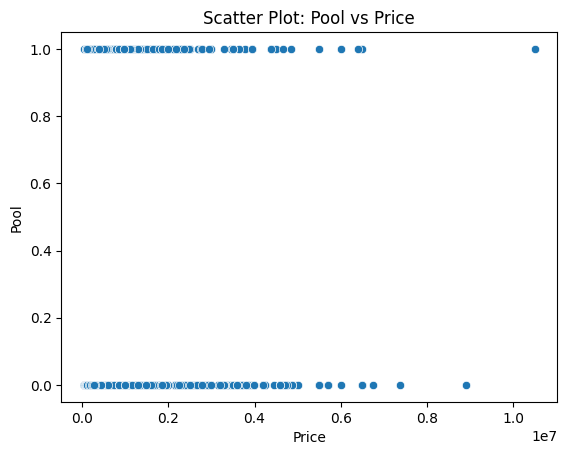

In [43]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["pool"])
# Adding titles
plt.title("Scatter Plot: Pool vs Price")
plt.ylabel("Pool")
plt.xlabel("Price")
# Show the plot
plt.show()


Price vs Fascade Correlation

In [44]:
fascade_v_price = ((df["price"]).corr(df["facades"]))
fascade_v_price

0.21228075676346164

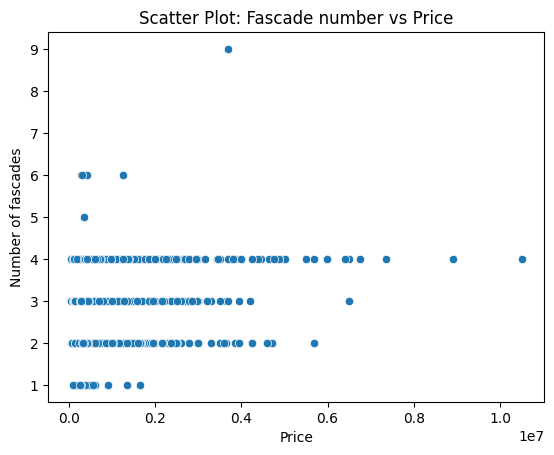

In [45]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["facades"])
# Adding titles
plt.title("Scatter Plot: Fascade number vs Price")
plt.ylabel("Number of fascades")
plt.xlabel("Price")
# Show the plot
plt.show()


In [46]:
region_facades_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    avg_facades =('facades', 'median'),
    
).reset_index().sort_values(by=["avg_price"], ascending=False)
print(region_facades_price)

           province  avg_price  avg_facades
9   Walloon Brabant   430000.0          4.0
3   Flemish Brabant   399000.0          3.0
10    West Flanders   369000.0          2.0
0           Antwerp   350000.0          3.0
1          Brussels   350000.0          2.0
2     East Flanders   350000.0          3.0
5           Limburg   329000.0          3.0
7        Luxembourg   320000.0          4.0
8             Namur   289000.0          4.0
4           Hainaut   277000.0          3.0
6             Liège   260000.0          3.0


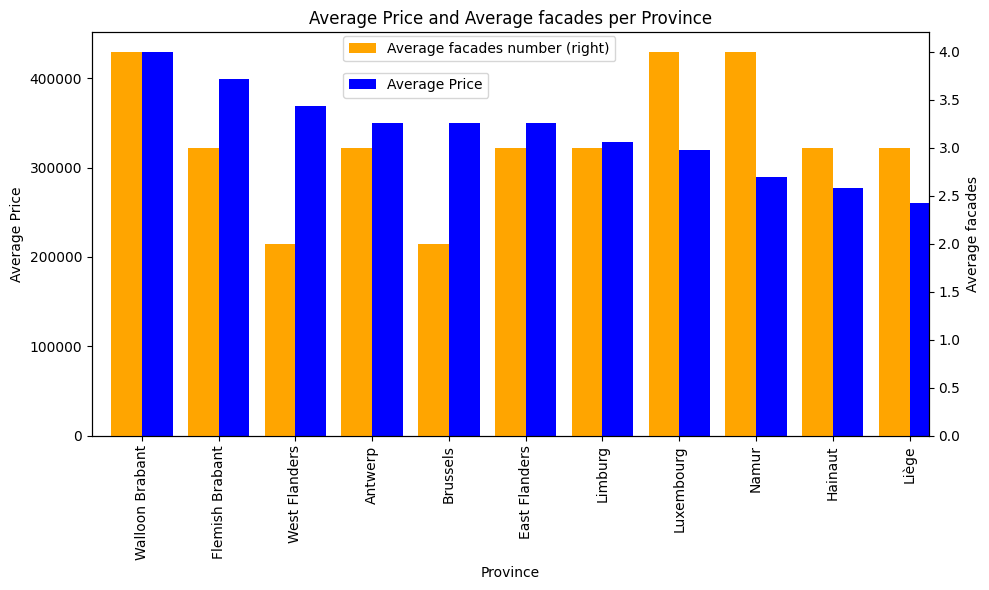

In [47]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot avg_price on the primary y-axis
region_facades_price.plot(
    x='province',
    y='avg_price',
    kind='bar',
    ax=ax,
    color='blue',
    label='Average Price',
    width=0.4,
    position=0
)

# Plot avg_facades on the secondary y-axis (scaled)
region_facades_price.plot(
    x='province',
    y='avg_facades',
    kind='bar',
    ax=ax,
    color='orange',
    label='Average facades number',
    width=0.4,
    position=1,
    secondary_y=True
)


# Adjusting the Y-axis scales for better visibility
ax.set_yscale('linear')  # Log scale for price and living area (optional but can help with very different value ranges)

# Adjust legend position
ax.legend(loc='upper left', bbox_to_anchor=(0.3,0.90), borderaxespad=0)
ax.right_ax.legend(loc='upper left', bbox_to_anchor=(0.3, 0.99), borderaxespad=0)

# Title and labels
ax.set_title("Average Price and Average facades per Province")
ax.set_ylabel("Average Price")
ax.right_ax.set_ylabel("Average facades")  # Label for the secondary axis
ax.set_xlabel("Province")

# Show the plot
plt.tight_layout()
plt.show()


Price vs Kitchen

In [48]:
kitchen_v_price = ((df["price"]).corr(df["kitchen"]))
kitchen_v_price

-0.03910360105731739

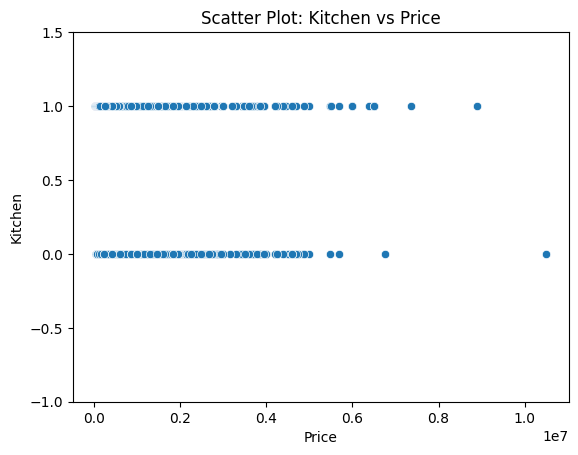

In [49]:
# Scatter plot of price vs terraceSurface
sns.scatterplot(x=df["price"], y=df["kitchen"])
# Adding titles
plt.title("Scatter Plot: Kitchen vs Price")
plt.xlabel("Price")
plt.ylabel("Kitchen")

#define x-axis range

plt.ylim(-1, 1.5)
# Show the plot
plt.show()


Price vs Terrace Correlation

In [50]:
df.columns

Index(['bedrooms', 'property_type', 'locality', 'postal_code', 'kitchen',
       'facades', 'price', 'furnished', 'terraceSurface', 'fireplace',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'province'],
      dtype='object')

In [51]:
terraceSurface_v_price = ((df["price"]).corr(df["terraceSurface"]))
terraceSurface_v_price

0.06584327453178798

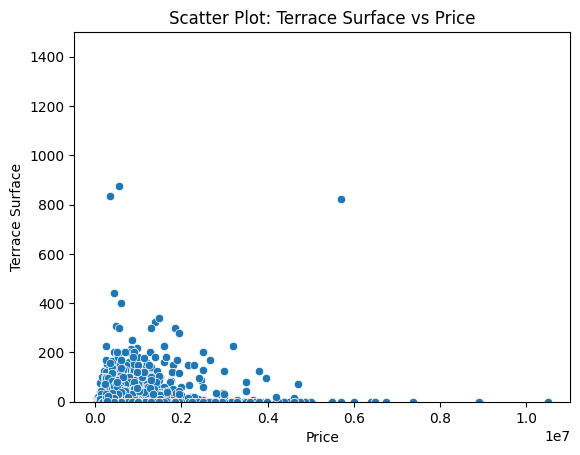

In [52]:
# Scatter plot of price vs terraceSurface
sns.scatterplot(x=df["price"], y=df["terraceSurface"])
# Adding titles
plt.title("Scatter Plot: Terrace Surface vs Price")
plt.xlabel("Price")
plt.ylabel("Terrace Surface")

#define x-axis range

plt.ylim(0, 1500)
# Show the plot
plt.show()


In [53]:
df_terraceSurface = df
df_terraceSurface["terraceSurface"] =df_terraceSurface["terraceSurface"].fillna(0)

print((df["price"]).corr(df["terraceSurface"]))
print((df_terraceSurface["price"]).corr(df_terraceSurface["terraceSurface"]))

0.06584327453178798
0.06584327453178798


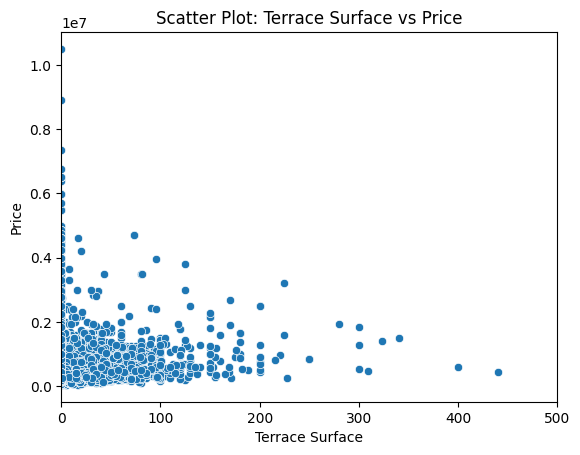

In [54]:
# Scatter plot of price vs terraceSurface
sns.scatterplot(x=df["terraceSurface"], y=df["price"])
# Adding titles
plt.title("Scatter Plot: Terrace Surface vs Price")
plt.xlabel("Terrace Surface")
plt.ylabel("Price")

#define x-axis range
plt.xlim(0, 500)

# Show the plot
plt.show()


Price vs Furnished

In [55]:
furnished_v_price = ((df["price"]).corr(df["furnished"]))
furnished_v_price

-0.004855352579458466

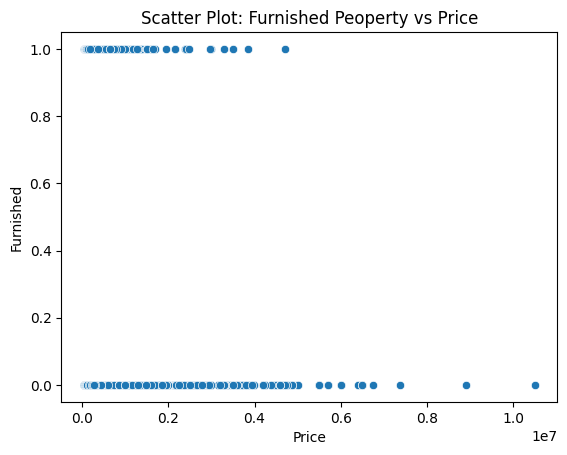

In [56]:
# Scatter plot of price vs bedrooms
sns.scatterplot(x=df["price"], y=df["furnished"])
# Adding titles
plt.title("Scatter Plot: Furnished Peoperty vs Price")
plt.ylabel("Furnished")
plt.xlabel("Price")
# Show the plot
plt.show()


Price vs Fireplace

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 0 to 16102
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          15012 non-null  int64  
 1   property_type     15012 non-null  object 
 2   locality          15012 non-null  object 
 3   postal_code       15012 non-null  int64  
 4   kitchen           15012 non-null  int64  
 5   facades           10898 non-null  float64
 6   price             15012 non-null  float64
 7   furnished         15012 non-null  int64  
 8   terraceSurface    15012 non-null  float64
 9   fireplace         15012 non-null  int64  
 10  buildingState     12532 non-null  float64
 11  gardenSurface     15012 non-null  int64  
 12  pool              15012 non-null  int64  
 13  livingArea        15012 non-null  float64
 14  surfaceOfThePlot  8188 non-null   float64
 15  province          15012 non-null  object 
dtypes: float64(6), int64(7), object(3)
memory usa

In [58]:
furnished_v_price = ((df["price"]).corr(df["furnished"]))
furnished_v_price
kitchen_v_price



-0.03910360105731739

Correlation Data Summary

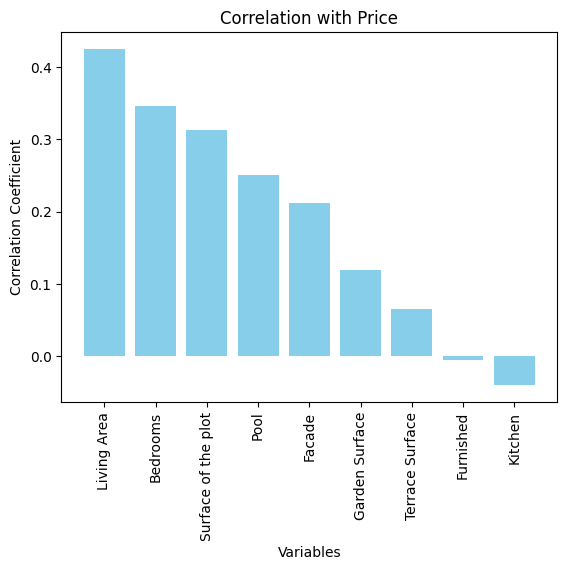

In [59]:
correlation_subset = {
    "Bedrooms": bedroom_v_price,
    "Living Area" : livingA_v_house,
    "Surface of the plot" : surfaceOfThePlot_v_price,
    "Pool": pool_v_price,
    "Facade": fascade_v_price,
    "Terrace Surface": terraceSurface_v_price,
    "Garden Surface" : garden_v_price,
    "Furnished": furnished_v_price,
    "Kitchen" : kitchen_v_price
    
    
    }

# Sorting Dictionary Values
sorted_correlation_subset = dict(sorted(correlation_subset.items(), key=lambda item: item[1], reverse=True))



# Creating the bar plot
plt.bar(sorted_correlation_subset.keys(), sorted_correlation_subset.values(), color='skyblue')

#Rotating X-axis titles
plt.xticks(rotation=90)
# Adding labels and title
plt.title("Correlation with Price")
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")

# Show the plot
plt.show()

Province_Value Count

In [60]:
df["province"].value_counts().sort_values(ascending = False)

province
West Flanders      3385
Antwerp            2779
East Flanders      2713
Flemish Brabant    1688
Brussels           1659
Liège               959
Limburg             458
Luxembourg          423
Hainaut             380
Walloon Brabant     355
Namur               213
Name: count, dtype: int64

In [61]:
df["buildingState"].unique()

array([ 4.,  2.,  3.,  1., nan])

In [62]:
df = df[df["price"] >= 40000]

In [63]:
buildings_as_new = df[df["buildingState"] == 1]
buildings_just_renovated = df[df["buildingState"] == 2]
buildings_good_quality = df[df["buildingState"] == 3]
buildings_2_restore = df[df["buildingState"] == 4]


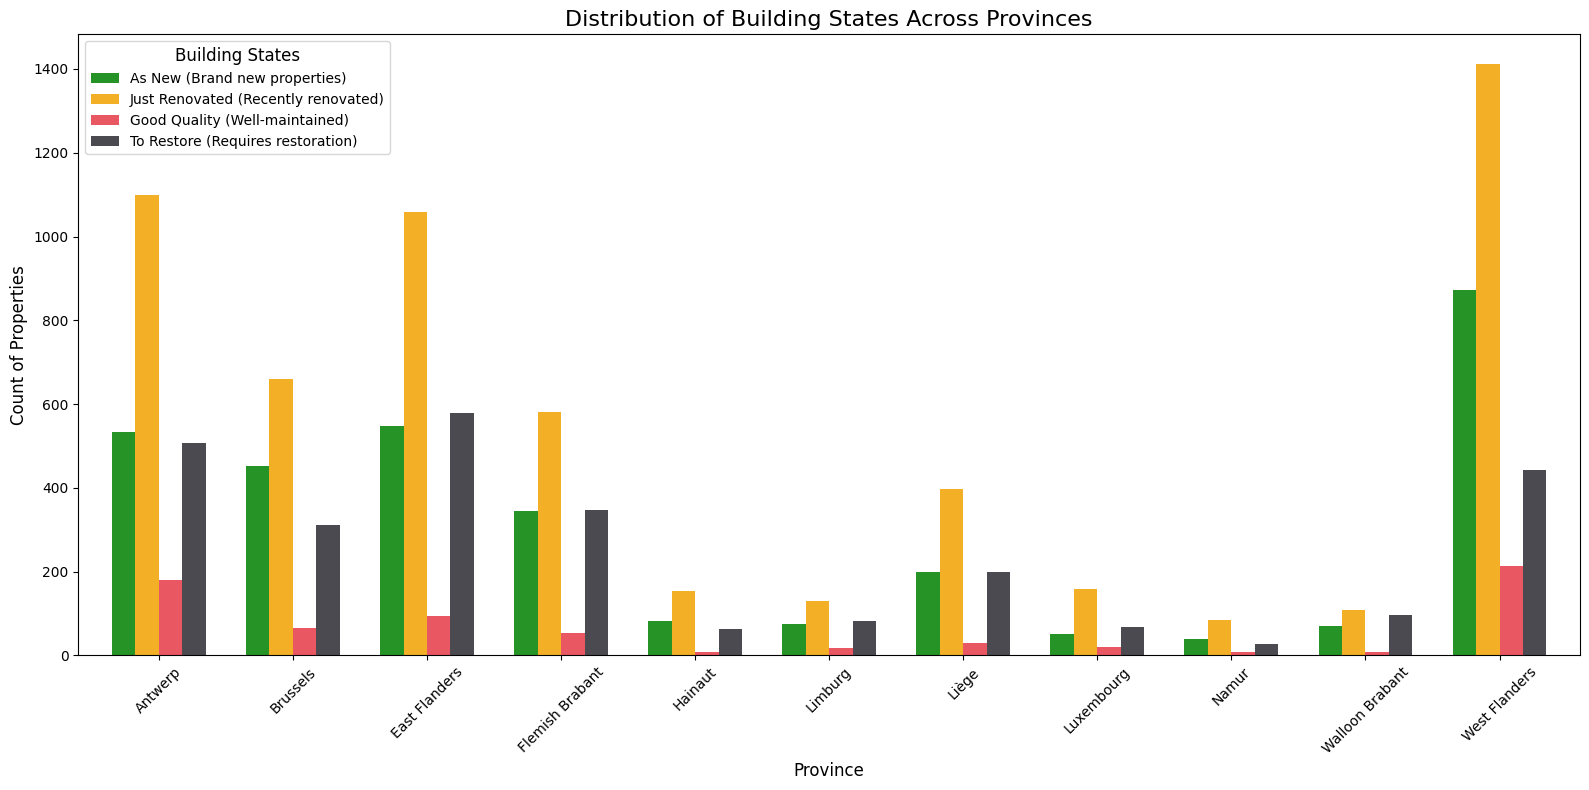

In [87]:
# Map building state numbers to descriptive labels
df["buildingStateLabel"] = df["buildingState"].map({
    1: "As New",
    2: "Just Renovated",
    3: "Good Quality",
    4: "To Restore"
})

# Group data by province and building state, then count occurrences
building_state_counts = (
    df.groupby(["province", "buildingStateLabel"])
    .size()
    .unstack(fill_value=0)  # Pivot table with provinces as rows and building states as columns
)

# Plot the clustered bar chart with enhanced contrast using lighter and darker hues
ax = building_state_counts.plot(
    kind="bar",
    figsize=(16, 8),  # Larger figure size for better legibility
    width=0.7,  # Adjust the width to reduce crowding of bars
    color=["green", "#F1A300", "#E63946", "#2D2A32"],  # Light to dark hues of Belgian colors
    alpha=0.85
)

# Add chart title and labels
plt.title("Distribution of Building States Across Provinces", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Count of Properties", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Add legend with descriptions
plt.legend(
    title="Building States",
    labels=["As New (Brand new properties)", "Just Renovated (Recently renovated)", "Good Quality (Well-maintained)", "To Restore (Requires restoration)"],
    fontsize=10,
    title_fontsize=12
)

# Increase the gap between the provinces for legibility
ax.set_xticks(ax.get_xticks())  # Ensures the tick positions are correctly set
ax.set_xticklabels(building_state_counts.index, fontsize=10)

# Show plot with tight layout
plt.tight_layout()
plt.show()


In [66]:
df.property_type

0        APARTMENT
1            HOUSE
2        APARTMENT
3            HOUSE
4            HOUSE
           ...    
16098        HOUSE
16099    APARTMENT
16100    APARTMENT
16101    APARTMENT
16102    APARTMENT
Name: property_type, Length: 15012, dtype: object

In [ ]:
house_group = df[df["property_type"] == "HOUSE"].value_counts()
apartment_group = df[df["property_type"] == "APARTMENT"].value_counts()

#house_v_price = df.groupby("price")[[df["property_type"] == "HOUSE"]]

house_ptype_vs_price = df.groupby("province").agg(
    avg_price=('price', 'median'),
    house_grouping =(house_group, 'mean'),
    apartment_grouping = (apartment_group, "mean")
)


In [89]:
property_counts = df.groupby(["province", "property_type"])["property_type"].count().unstack()

# Rename columns for clarity
property_counts.columns = ["House Count", "Apartment Count"]
print(property_counts)

                 House Count  Apartment Count
province                                     
Antwerp                 1258             1521
Brussels                1348              311
East Flanders            877             1836
Flemish Brabant          453             1235
Hainaut                   82              298
Limburg                  125              333
Liège                    291              668
Luxembourg                94              329
Namur                     58              155
Walloon Brabant           98              257
West Flanders           2140             1245


                 House Count  Apartment Count
province                                     
Antwerp                 1258             1521
Brussels                1348              311
East Flanders            877             1836
Flemish Brabant          453             1235
Hainaut                   82              298
Limburg                  125              333
Liège                    291              668
Luxembourg                94              329
Namur                     58              155
Walloon Brabant           98              257
West Flanders           2140             1245


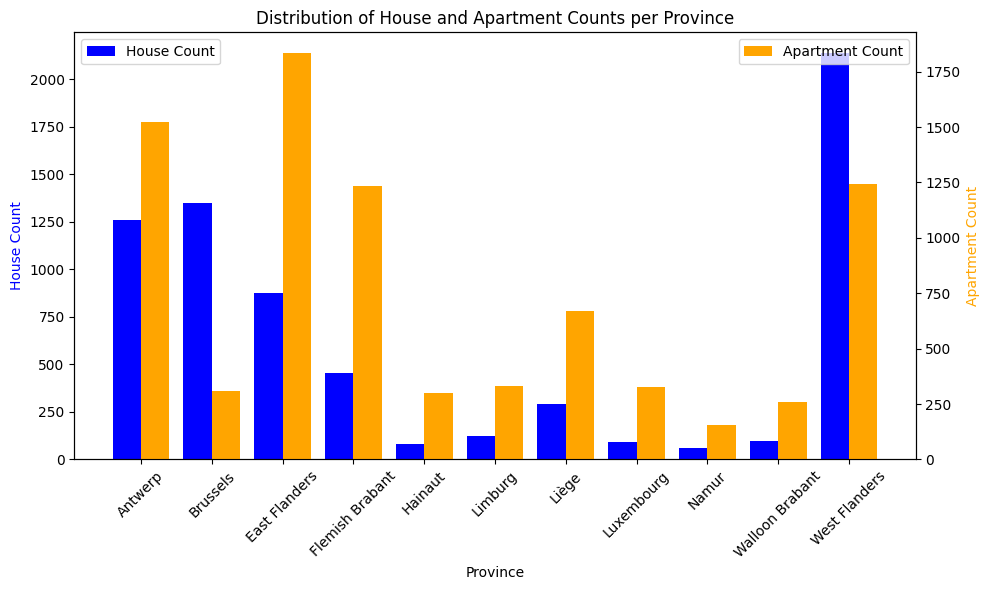

In [93]:
import matplotlib.pyplot as plt

# Ensure data is printed for debugging
print(property_counts)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positions
bar_width = 0.4
x = range(len(property_counts.index))

# Plot House Count
ax.bar(
    x=[i - bar_width / 2 for i in x],
    height=property_counts["House Count"],
    width=bar_width,
    color='blue',
    label='House Count',
)

# Plot Apartment Count on the secondary y-axis
ax2 = ax.twinx()
ax2.bar(
    x=[i + bar_width / 2 for i in x],
    height=property_counts["Apartment Count"],
    width=bar_width,
    color='orange',
    label='Apartment Count',
)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(property_counts.index, rotation=45)

# Labels and title
ax.set_title("Distribution of House and Apartment Counts per Province")
ax.set_xlabel("Province")
ax.set_ylabel("House Count", color='blue')
ax2.set_ylabel("Apartment Count", color='orange')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
def building_state_numerical():
   if df["buildingState"] == "AS_NEW":
      return df["buildingState"] == 1
   elif df["buildingState"] == "JUST_RENOVATED":
      return df["buildingState"] == 2
   elif df["buildingState"] == "GOOD":
      return df["buildingState"] == 3
   elif df["buildingState"] == "TO_RENOVATE" or "TO_RESTORE" or "TO_BE_DONE_UP":
      return df["buildingState"] == 4
      


df["buildingState"] = df["buildingState"].apply(building_state_numerical)

In [ ]:
df_filtered = df.loc[df["buildingState"] == "TO_RESTORE", ["price", "province"]]
print(df_filtered)

Provincial value count

<Axes: title={'center': 'Absolute frequency distribution of Regional indicator'}, xlabel='province'>

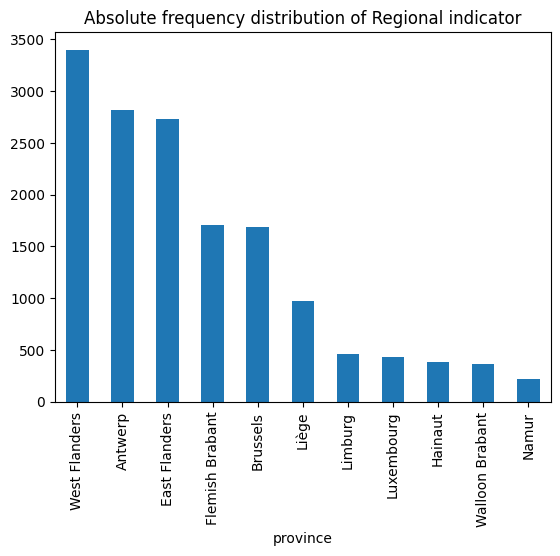

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df["province"].value_counts().sort_values(ascending = False).plot(kind='bar', title='Absolute frequency distribution of Regional indicator')

In [ ]:
df.head()

,house_index,bedrooms,property_type,property_subtype,locality,postal_code,street,number,box,kitchen,...,fireplaceCount,buildingState,garden,gardenSurface,pool,landSurface,livingArea,surfaceOfThePlot,typeOfSale,province
0,0,2,APARTMENT,APARTMENT,LEUVEN,3000,Kaboutermansstraat,89,00.01,1,...,0,4.0,1,100,0,NaN,60.0,NaN,NaN,NaN
1,1,3,HOUSE,HOUSE,Waarschoot,9950,Zoutweg,120,NaN,1,...,0,2.0,0,0,0,260.0,136.0,260.0,NaN,east_flanders
2,2,1,APARTMENT,APARTMENT,BORGERHOUT,2140,Bouwhandelstraat,53,202,1,...,0,3.0,0,0,0,NaN,59.0,NaN,NaN,antwerp_province
3,3,5,HOUSE,HOUSE,Bouillon Corbion,6838,Rue du Tambour,30,NaN,1,...,0,4.0,1,400,0,562.0,156.0,562.0,NaN,luxembourg_province
4,4,2,HOUSE,HOUSE,Grâce-Hollogne,4460,Rue des Meuniers,36,A,1,...,0,4.0,1,275,0,476.0,151.0,476.0,NaN,liège_province


In [ ]:
province_count_median = df.groupby("province").value_counts()
province_count_median

province             house_index  bedrooms  property_type  property_subtype    locality                postal_code  street                        number  box  kitchen  facades  price      furnished  terrace  terraceSurface  fireplace  fireplaceCount  buildingState  garden  gardenSurface  pool  landSurface  livingArea  surfaceOfThePlot  typeOfSale 
antwerp_province     16603        3         HOUSE          HOUSE               Mechelen                2800         Tessestraat                   3       2    1        2.0      375000.0   0          1        5.0             0          0               1.0            0       0              0     0.0          80.0        0.0               UnderOption    1
                     17446        4         HOUSE          HOUSE               Antwerpen               2000         Kattendijkdok-Oostkaai        82      1    1        3.0      568000.0   0          1        6.0             0          0               1.0            0       0              0     

Province Vs Price Median Average

<Axes: title={'center': 'Frequency distribution of dataset by median average'}, xlabel='province'>

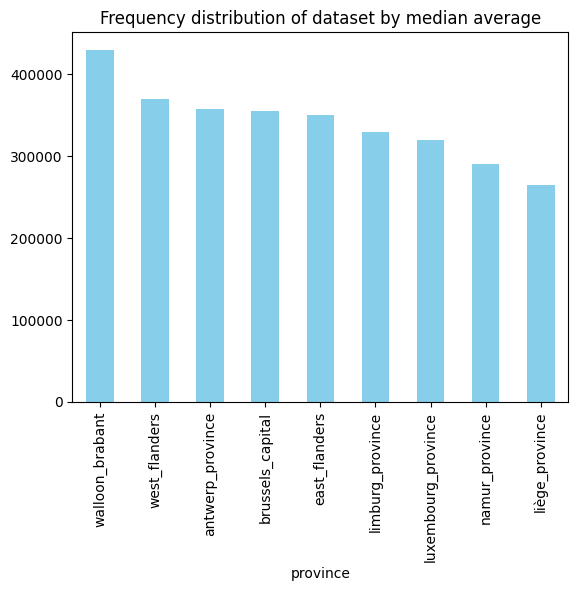

In [ ]:
province_median = df.groupby("province")["price"].median()
province_median.sort_values(ascending=False).plot(kind="bar", title = "Frequency distribution of dataset by median average", color="skyblue")

In [ ]:
province_median.quantile()

350000.0

TODO

Price vs all varibles in one chart
House & Apartment same price correlation